Ao partir de aqui creo a simulaçao de preços do bono Tesouro Direto 2032 prefixado 15% com o cenario
Selic_Focus_Extend 

Importo a tabela tbcenarios como dfcenarios

In [2]:
import sqlite3
import pandas as pd

# Conectar ao banco de dados SQLite
conn = sqlite3.connect('SqCenarios.db')

# Importar a tabela 'tbcenarios' como um DataFrame
try:
    query = "SELECT * FROM tbcenarios"
    dfcenarios = pd.read_sql_query(query, conn)
    print("Tabela 'tbcenarios' importada com sucesso como dfcenarios!")
    display(dfcenarios.head())  # Exibir as primeiras linhas do DataFrame
except Exception as e:
    print("Erro ao importar a tabela:", e)
finally:
    conn.close()

Tabela 'tbcenarios' importada com sucesso como dfcenarios!


,id_cenario,nome,descripzao,datafin
0,5,Selic Focus Ext Ult,Cenario com a última previção focus da tasa Se...,2035-01-01 00:00:00


importo a tabela tbcenariosdados para um id_cenarios elegido como um dfcenariosdados

In [5]:
import sqlite3
import pandas as pd

# Conectar ao banco de dados SQLite (certifique-se de fornecer o caminho correto para o arquivo do BD)
conn = sqlite3.connect('SqCenarios.db')

# Valor determinado para id_cenario que queremos filtrar
id_cenario_valor = 5  # Altere esse valor conforme sua necessidade

# Query SQL para selecionar os campos desejados filtrando pelo id_cenario
query = """
SELECT 
    id_cenario, 
    data, 
    valor, 
    desvio 
FROM 
    tbcenariosdados
WHERE 
    id_cenario = ?
"""

# Carregar os dados da query para o DataFrame
dfcenariosdados = pd.read_sql_query(query, conn, params=(id_cenario_valor,))

# Exibir as primeiras linhas do DataFrame
display(dfcenariosdados)
# Fechar a conexão com o banco de dados
conn.close()

,id_cenario,data,valor,desvio
0,5,2025-05-31 00:00:00,14.7870,0
1,5,2025-06-30 00:00:00,15.0405,0
2,5,2025-07-31 00:00:00,15.0557,0
3,5,2025-08-31 00:00:00,15.0557,0
4,5,2025-09-30 00:00:00,15.0528,0
...,...,...,...,...
111,5,2034-08-31 00:00:00,12.3278,0
112,5,2034-09-30 00:00:00,12.3278,0
113,5,2034-10-31 00:00:00,12.3278,0
114,5,2034-11-30 00:00:00,12.3278,0


creo uma coluna com as taxas anuales mensalisadas

In [8]:
import pandas as pd



# Converter colunas para o formato datetime

dfcenariosdados['data'] = pd.to_datetime(dfcenariosdados['data'])

# Adicionar a coluna "TaxaMensal" ao DataFrame original
dfcenariosdados['taxamensal'] = ((1 + dfcenariosdados['valor'] / 100) ** (1 / 12)) - 1

# Exibi DataFrame atualizado
display(dfcenariosdados)

,id_cenario,data,valor,desvio,taxamensal
0,5,2025-05-31,14.7870,0,0.011559
1,5,2025-06-30,15.0405,0,0.011745
2,5,2025-07-31,15.0557,0,0.011756
3,5,2025-08-31,15.0557,0,0.011756
4,5,2025-09-30,15.0528,0,0.011754
...,...,...,...,...,...
111,5,2034-08-31,12.3278,0,0.009735
112,5,2034-09-30,12.3278,0,0.009735
113,5,2034-10-31,12.3278,0,0.009735
114,5,2034-11-30,12.3278,0,0.009735


Creo u dftitulos com a tabela dftitulos para facer selecção do titulo a simular no cenario

In [11]:
import sqlite3
import pandas as pd

# Conectar ao banco de dados (certifique-se de que o arquivo 'SqCenarios.db' esteja no caminho correto)
conn = sqlite3.connect('SqCenarios.db')

# Consulta SQL para selecionar todos os registros da tabela tbtitulos
query = "SELECT * FROM tbtitulos"

# Importar os dados para um DataFrame
dftitulos = pd.read_sql_query(query, conn)

# Exibir as primeiras linhas do DataFrame para verificação
print(dftitulos.head())

# Fechar a conexão com o banco de dados
conn.close()

   id_titulos                                      nome codigo  tipo
0           1  Tesouro Direto Prefixado  Selic 15% 2032   None  Bono


Creo um dftitulosfluxo baseado na tabula tbtitulosfluxo filtrada por id_titulos = 1

In [14]:
import sqlite3
import pandas as pd

# Conectar ao banco de dados SQLite
conn = sqlite3.connect('SqCenarios.db')

# Definir a consulta SQL para filtrar pelo campo idtitulo = 1
query = "SELECT * FROM tbtitulosfluxo WHERE id_titulos = 1"

# Executar a consulta e carregar os dados como DataFrame
try:
    dftitulosfluxo = pd.read_sql_query(query, conn)
    print("Dados importados com sucesso!")
    display(  dftitulosfluxo ) # Exibir as primeiras linhas do DataFrame
    display(dftitulosfluxo.columns)
except Exception as e:
    print("Erro ao importar os dados:", e)
finally:
    conn.close()

Dados importados com sucesso!


,id_titulosfluxo,id_titulos,data,tipo,porcentagem
0,1,1,2032-01-01 00:00:00\t,Amortização,1


Index(['id_titulosfluxo', 'id_titulos', 'data', 'tipo', 'porcentagem'], dtype='object')

creo um dftitulosprezos com la tbtitulosprezos selec com id_titulos = 1

In [24]:
import sqlite3
import pandas as pd

# Conectar ao banco de dados SQLite
conn = sqlite3.connect('SqCenarios.db')

# Definir a consulta SQL para filtrar pelo campo idtitulo = 1
query = "SELECT * FROM tbtitulosprezos WHERE id_titulos = 1"

# Executar a consulta e carregar os dados como DataFrame
try:
    dftitulosprezos = pd.read_sql_query(query, conn)
    print("Dados importados com sucesso!")
    display(  dftitulosprezos ) # Exibir as primeiras linhas do DataFrame
    display ( dftitulosprezos.dtypes)
except Exception as e:
    print("Erro ao importar os dados:", e)
finally:
    conn.close()

Dados importados com sucesso!


,id_titulosprezos,id_titulos,frequencia,data,prezo
0,1,1,Mensal,2025-05-31 00:00:00,0.4


id_titulosprezos      int64
id_titulos            int64
frequencia           object
data                 object
prezo               float64
dtype: object

Calcula a Tir do bono pra suo valor atual

In [32]:
import pandas as pd
import numpy as np
from scipy.optimize import newton

# Verificar se a coluna 'data' está em formato datetime
dftitulosprezos['data'] = pd.to_datetime(dftitulosprezos['data'])

# Encontrar a data máxima
indice_max_data = dftitulosprezos['data'].idxmax()

# Acessar o valor de 'prezo' correspondente à data máxima
valor_inicial =-dftitulosprezos.loc[indice_max_data, 'prezo']
data_inicial = dftitulosprezos.loc[indice_max_data, 'data']

# Verificar se as datas estão em formato datetime
dftitulosfluxo['data'] = pd.to_datetime(dftitulosfluxo['data'])

# Criar os fluxos de caixa e datas como listas
fluxos = [valor_inicial] + dftitulosfluxo['porcentagem'].tolist()
datas = [data_inicial] + dftitulosfluxo['data'].tolist()

# Calcular os intervalos de tempo (em anos fracionados)
dias = [(data - data_inicial).days / 365.0 for data in datas]

# Imprimir para verificar os dados
print("Fluxos de caixa:", fluxos)
print("Dias:", dias)

# Definir a função de NPV
def xnpv(taxa, fluxos, dias):
    try:
        return sum(fluxo / (1 + taxa)**dia for fluxo, dia in zip(fluxos, dias))
    except ZeroDivisionError:
        return np.inf  # Evitar problemas de divisão por zero

# Definir a função para calcular a TIR
def xtir(fluxos, dias, guess=0.1):
    try:
        return newton(lambda r: xnpv(r, fluxos, dias), guess)
    except RuntimeError:
        print("Erro: o método de Newton não convergiu. Tente ajustar o chute inicial.")
        return None

# Calcular a TIR
tir = xtir(fluxos, dias, guess=0.1)
if tir is not None:
    print(f"A TIR calculada é: {tir:.4%}")
else:
    print("A TIR não pôde ser calculada.")

Fluxos de caixa: [-0.4, 1]
Dias: [0.0, 6.5917808219178085]
A TIR calculada é: 14.9130%


Calcula Tir Bonos para o dataframe dftitulosfluxo importado da tabula tbtitulos fluxo do BD para id_titulo = 1

In [35]:
import pandas as pd
import numpy as np

# Converter as datas do fluxo para datetime
dftitulosfluxo['data'] = pd.to_datetime(dftitulosfluxo['data'])

# Função para calcular o VAN
def calcular_van(valor_medio, data_cenario, df_fluxos):
    van = 0
    for _, fluxo in df_fluxos.iterrows():
        # Calcular o tempo em anos entre data_cenario e a data do fluxo
        anos = (fluxo['data'] - pd.to_datetime(data_cenario)).days / 365.0
        # Calcular valor descontado
        van += fluxo['porcentagem'] / ((1 + valor_medio / 100) ** anos)
    return van

# Adicionar a coluna 'prezo' convertendo cada data do cenário para datetime na hora da aplicação
dfcenariosdados['prezo'] = dfcenariosdados.apply(
    lambda row: calcular_van(row['valor'], row['data'], dftitulosfluxo),
    axis=1
)

display(dfcenariosdados)

,id_cenario,data,valor,desvio,taxamensal,prezo
0,5,2025-05-31,14.7870,0,0.011559,0.402903
1,5,2025-06-30,15.0405,0,0.011745,0.401686
2,5,2025-07-31,15.0557,0,0.011756,0.406150
3,5,2025-08-31,15.0557,0,0.011756,0.411016
4,5,2025-09-30,15.0528,0,0.011754,0.415847
...,...,...,...,...,...,...
111,5,2034-08-31,12.3278,0,0.009735,1.363285
112,5,2034-09-30,12.3278,0,0.009735,1.376373
113,5,2034-10-31,12.3278,0,0.009735,1.390030
114,5,2034-11-30,12.3278,0,0.009735,1.403375


In [37]:
dfsimulazoes = dfcenariosdados
display (dfsimulazoes)

,id_cenario,data,valor,desvio,taxamensal,prezo
0,5,2025-05-31,14.7870,0,0.011559,0.402903
1,5,2025-06-30,15.0405,0,0.011745,0.401686
2,5,2025-07-31,15.0557,0,0.011756,0.406150
3,5,2025-08-31,15.0557,0,0.011756,0.411016
4,5,2025-09-30,15.0528,0,0.011754,0.415847
...,...,...,...,...,...,...
111,5,2034-08-31,12.3278,0,0.009735,1.363285
112,5,2034-09-30,12.3278,0,0.009735,1.376373
113,5,2034-10-31,12.3278,0,0.009735,1.390030
114,5,2034-11-30,12.3278,0,0.009735,1.403375


crea dfsimulazoes com o cenario limitado a la data de vencimento do bono

In [40]:
dfsimulazoes['data'] = pd.to_datetime(dfsimulazoes['data'])
max_fluxo_data = dftitulosfluxo['data'].max()
dfsimulazoes = dfsimulazoes[dfsimulazoes['data'] <= max_fluxo_data].copy()
dfsimulazoes['id_titulos'] = dftitulos['id_titulos'].iloc[0]
dfsimulazoes['titulo_nome'] = dftitulos['nome'].iloc[0]
dfsimulazoes['cenario_nome'] = dfcenarios['nome'].iloc[0]
display (dfsimulazoes)

,id_cenario,data,valor,desvio,taxamensal,prezo,id_titulos,titulo_nome,cenario_nome
0,5,2025-05-31,14.7870,0,0.011559,0.402903,1,Tesouro Direto Prefixado Selic 15% 2032,Selic Focus Ext Ult
1,5,2025-06-30,15.0405,0,0.011745,0.401686,1,Tesouro Direto Prefixado Selic 15% 2032,Selic Focus Ext Ult
2,5,2025-07-31,15.0557,0,0.011756,0.406150,1,Tesouro Direto Prefixado Selic 15% 2032,Selic Focus Ext Ult
3,5,2025-08-31,15.0557,0,0.011756,0.411016,1,Tesouro Direto Prefixado Selic 15% 2032,Selic Focus Ext Ult
4,5,2025-09-30,15.0528,0,0.011754,0.415847,1,Tesouro Direto Prefixado Selic 15% 2032,Selic Focus Ext Ult
...,...,...,...,...,...,...,...,...,...
75,5,2031-08-31,12.3278,0,0.009735,0.961582,1,Tesouro Direto Prefixado Selic 15% 2032,Selic Focus Ext Ult
76,5,2031-09-30,12.3278,0,0.009735,0.970814,1,Tesouro Direto Prefixado Selic 15% 2032,Selic Focus Ext Ult
77,5,2031-10-31,12.3278,0,0.009735,0.980447,1,Tesouro Direto Prefixado Selic 15% 2032,Selic Focus Ext Ult
78,5,2031-11-30,12.3278,0,0.009735,0.989860,1,Tesouro Direto Prefixado Selic 15% 2032,Selic Focus Ext Ult


In [42]:

import sqlite3

# Conectar ao banco de dados SQLite
conn = sqlite3.connect('SqCenarios.db')
cursor = conn.cursor()

# Garantir que a coluna 'data' esteja no formato de texto
dfsimulazoes['data'] = dfsimulazoes['data'].astype(str)

# Iterar sobre as linhas do DataFrame e inserir os valores na tabela
try:
    for _, row in dfsimulazoes.iterrows():
        sql = """
        INSERT INTO tbsimulazoes (id_cenario, id_titulos, data, prezo)
        VALUES (?, ?, ?, ?)
        """
        # Substituir os valores das colunas
        cursor.execute(sql, (row['id_cenario'], row['id_titulos'], row['data'], row['prezo']))

    # Confirmar as alterações
    conn.commit()
    print("Dados inseridos com sucesso na tabela tbsimulazoes!")

except Exception as e:
    print(f"Erro ao inserir dados: {e}")

finally:
    # Fechar a conexão com o banco de dados
    conn.close()


Dados inseridos com sucesso na tabela tbsimulazoes!


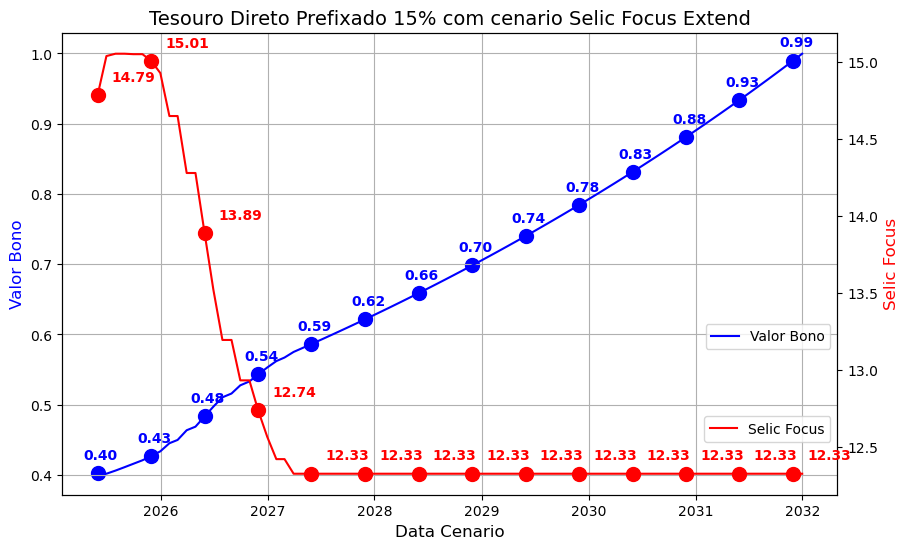

In [50]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Código que cria o gráfico principal
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotar 'valor_titulo' no eixo Y principal
ax1.plot(dfsimulazoes['data'], dfsimulazoes['prezo'], linestyle='-', color='b', label='Valor Bono')
ax1.set_xlabel('Data Cenario', fontsize=12)
ax1.set_ylabel('Valor Bono', fontsize=12, color='b')
ax1.grid(True)

# Plotar a série "valor_medio" no eixo secundário
ax2 = ax1.twinx()
ax2.plot(dfsimulazoes['data'], dfsimulazoes['valor'], linestyle='-', color='r', label='Selic Focus')
ax2.set_ylabel('Selic Focus', fontsize=12, color='r')

# --- Inserção dos marcadores a cada 6 meses ---

# Obter a data mínima e máxima do df_cenarios
start_date = dfsimulazoes['data'].min()
end_date = dfsimulazoes['data'].max()

# Gerar datas de marcação a cada 6 meses
marker_dates = []
current_date = start_date
while current_date <= end_date:
    marker_dates.append(current_date)
    current_date += pd.DateOffset(months=6)

# Para cada data de marcador, encontrar o registro mais próximo e aplicar aos dois eixos
for marker in marker_dates:
    idx = (dfsimulazoes['data'] - marker).abs().idxmin()  # Encontra o índice do ponto mais próximo
    nearest_date = dfsimulazoes.loc[idx, 'data']  # Data mais próxima
    valor_titulo = dfsimulazoes.loc[idx, 'prezo']  # Valor no eixo principal
    valor_medio = dfsimulazoes.loc[idx, 'valor']  # Valor no eixo secundário

    # Adicionar marcadores e etiquetas ao eixo principal (ax1)
    ax1.scatter(nearest_date, valor_titulo, s=100, color='blue')
    #, marker='D'
    ax1.annotate(f"{valor_titulo:.2f}", 
                 xy=(nearest_date, valor_titulo), 
                 xytext=(-10, 10),  # Ajuste de posição da etiqueta
                 textcoords='offset points', 
                 color='blue', fontsize=10, fontweight='bold')

    # Adicionar marcadores e etiquetas ao eixo secundário (ax2)
    ax2.scatter(nearest_date, valor_medio, s=100, color='red')
    #, marker='D'
    ax2.annotate(f"{valor_medio:.2f}", 
                 xy=(nearest_date, valor_medio), 
                 xytext=(10, 10),  # Ajuste de posição da etiqueta
                 textcoords='offset points', 
                 color='red', fontsize=10, fontweight='bold')

# Adicionar título ao gráfico
plt.title('Tesouro Direto Prefixado 15% com cenario Selic Focus Extend', fontsize=14)

# Adicionar legendas para os dois eixos
ax1.legend(loc='lower right',bbox_to_anchor=(1, 0.3)) # Ajustar a localização para os labels do eixo principal
ax2.legend(loc='lower right', bbox_to_anchor=(1, 0.1)) # Ajustar a localização para os labels do eixo secundário
#salva grafico como imagem png
plt.savefig('Selic_Focus_Prefix_2032.png', dpi=300)
# Exibir o gráfico
plt.show()



Creo um informe em pdf

In [53]:
from fpdf import FPDF

# Criar uma classe para o PDF com cabeçalho e rodapé
class PDF(FPDF):
    def header(self):
        # Configurar o título
        self.set_font('Arial', 'B', 16)
        self.cell(0, 10, 'Tesouro Prefixado Simulado com Selic Focus', border=0, ln=True, align='C')

    def footer(self):
        # Configurar o rodapé
        self.set_y(-15)  # Posicionar 15 unidades acima da borda inferior
        self.set_font('Arial', size=10)
        # Adicionar número da página à esquerda
        self.cell(0, 10, f'Página {self.page_no()}', border=0, ln=False, align='L')
        # Adicionar "SciTrading" à direita
        self.cell(0, 10, 'SciTrading', border=0, ln=False, align='R')

# Instanciar o PDF
pdf = PDF()
pdf.set_left_margin(10)
pdf.set_right_margin(10)
pdf.add_page()

# Configurar o texto acima
texto1 = """Este é um gráfico com os valores de preço do bono Tesouro Direto prefixado 15 % vencimento 1/2032.
A base de cálculo são os valores de Taxa Selic da última previsão do informe "Focus".
O informe Focus é uma média dos valores estimados de Selic para os próximos 24 meses 
por mais de 130 das mais importantes entidades financeiras.
Para os fins da simulação, estendemos o último valor da previsão até Janeiro de 2032."""

# Adicionar o texto acima
pdf.set_font('Arial', size=12)
pdf.multi_cell(0, 10, texto1)

# Adicionar uma imagem
pdf.image('Selic_Focus_Prefix_2032.png', x=10, y=pdf.get_y() + 10, w=180)  # A posição Y é ajustada com pdf.get_y()

# Adicionar texto abaixo da imagem
pdf.ln(125)  # Adicionar espaço vertical para posicionar o texto abaixo da imagem
texto2 = """Observações :
  A taxa de retorno anual se conservamos o bono hasta su vencimento (R$ 1,00) e de 14,65% .
  Si compramos o bono no Maio do 2025 (R$ 0,40) e vendemos no Maio do 2027(R$ 0,59)  obtenemos uma taxa casi del 50% em dois anos
  
   A simulação leva em consideração o comportamento histórico da Selic e os ajustes futuros, 
oferecendo um panorama confiável para análise de investimentos."""
pdf.multi_cell(0, 10, texto2)

# Salvar o PDF
pdf.output('Selic_Focus_Prefix_2032.pdf')
print("PDF criado com sucesso!")

PDF criado com sucesso!
